# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions


In [1]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.7.1'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.
* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets
**(one of the most important concepts in machine learning in general)**

Let's create a training and test set with our data

In [4]:
# Create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

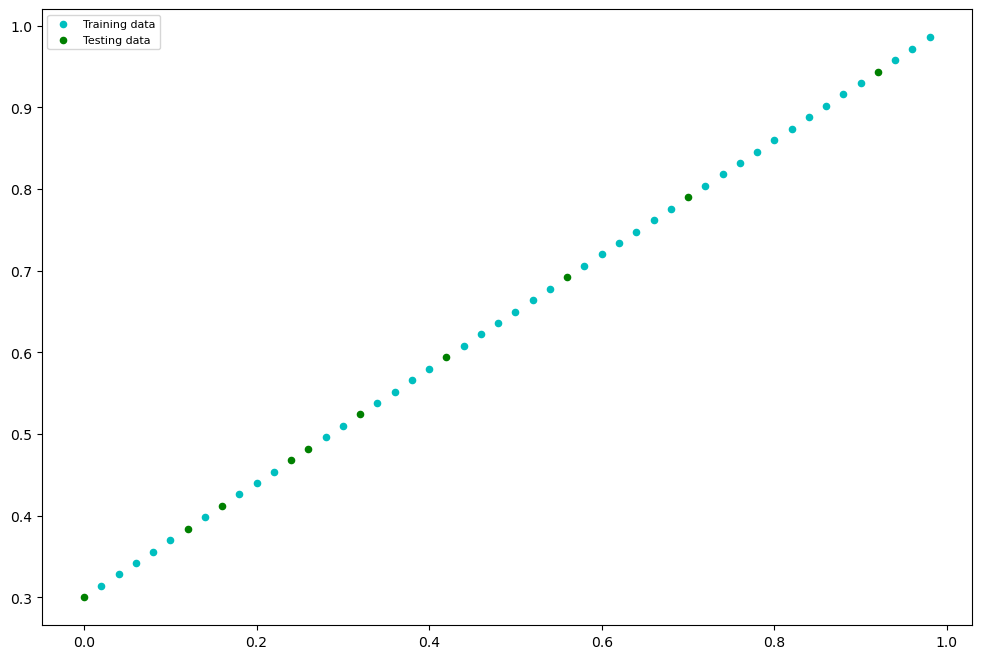

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data, and compare predictions.
    :param train_data:
    :param train_labels:
    :param test_data:
    :param test_labels:
    :param predictions:
    :return:
    """
    plt.figure(figsize=(12, 8))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="c", s=20, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=20, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=20, label="Predictions")

    # Show the legend
    plt.legend(prop={'size': 8})
plot_predictions()

## 2. Build model

Our first PyTorch model!!

What our model does:
* Starty with random values (weight and bias)
* Look at training data and adjust the random values (the weight and bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent - https://youtu.be/lHZwWFHWa-w
2. Backpropagation - https://youtu.be/llg3gGewQ5U

In [32]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return x * self.weight + self.bias # this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

See more of these essential modules via PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.

In [33]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [34]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run through the `forward()` method.

In [35]:
X_test, y_test

(tensor([[0.1600],
         [0.1200],
         [0.5600],
         [0.2400],
         [0.3200],
         [0.0000],
         [0.7000],
         [0.9200],
         [0.2600],
         [0.4200]]),
 tensor([[0.4120],
         [0.3840],
         [0.6920],
         [0.4680],
         [0.5240],
         [0.3000],
         [0.7900],
         [0.9440],
         [0.4820],
         [0.5940]]))

In [36]:
# MAke predictions with model
with torch.inference_mode():
    y_pred = model_0()
y_pred

tensor([[0.1827],
        [0.1692],
        [0.3174],
        [0.2096],
        [0.2366],
        [0.1288],
        [0.3645],
        [0.4386],
        [0.2163],
        [0.2702]])

In [37]:
y_pred

tensor([[0.1827],
        [0.1692],
        [0.3174],
        [0.2096],
        [0.2366],
        [0.1288],
        [0.3645],
        [0.4386],
        [0.2163],
        [0.2702]])

In [38]:
y_test

tensor([[0.4120],
        [0.3840],
        [0.6920],
        [0.4680],
        [0.5240],
        [0.3000],
        [0.7900],
        [0.9440],
        [0.4820],
        [0.5940]])

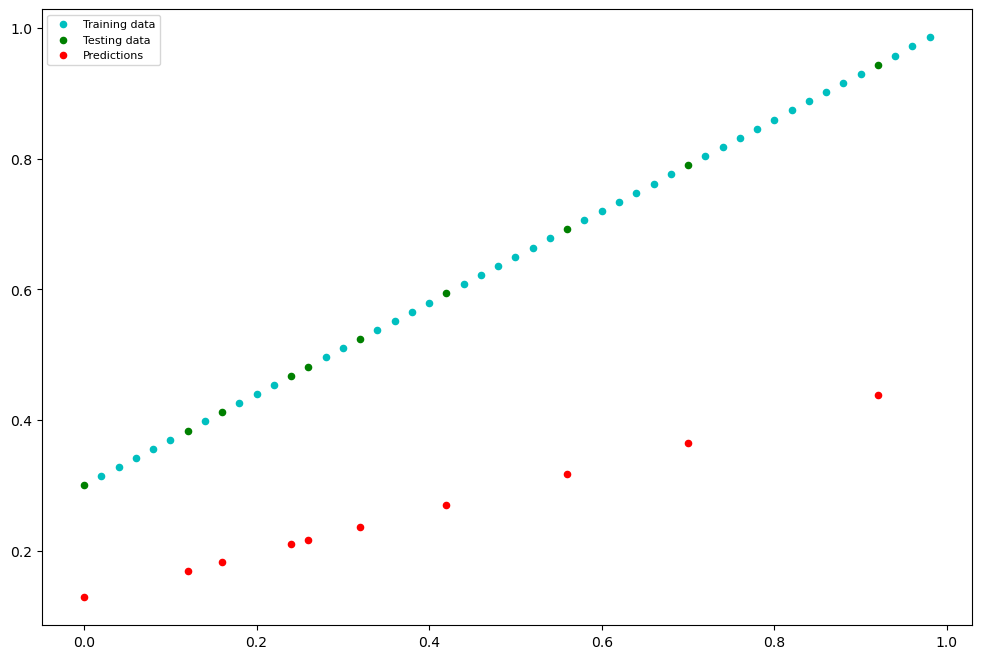

In [40]:
plot_predictions(predictions=y_pred)

See more on inference mode here - https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=cnKav09iTgwQ-rfri6u7PQ